<a href="https://colab.research.google.com/github/ankitasutar/My_ML_DL_Projects/blob/main/Red_Wine_quality_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
url="https://raw.githubusercontent.com/ankitasutar/My_ML_DL_Projects/main/red_wine.csv"
wine=pd.read_csv(url)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
len(wine.columns)

12

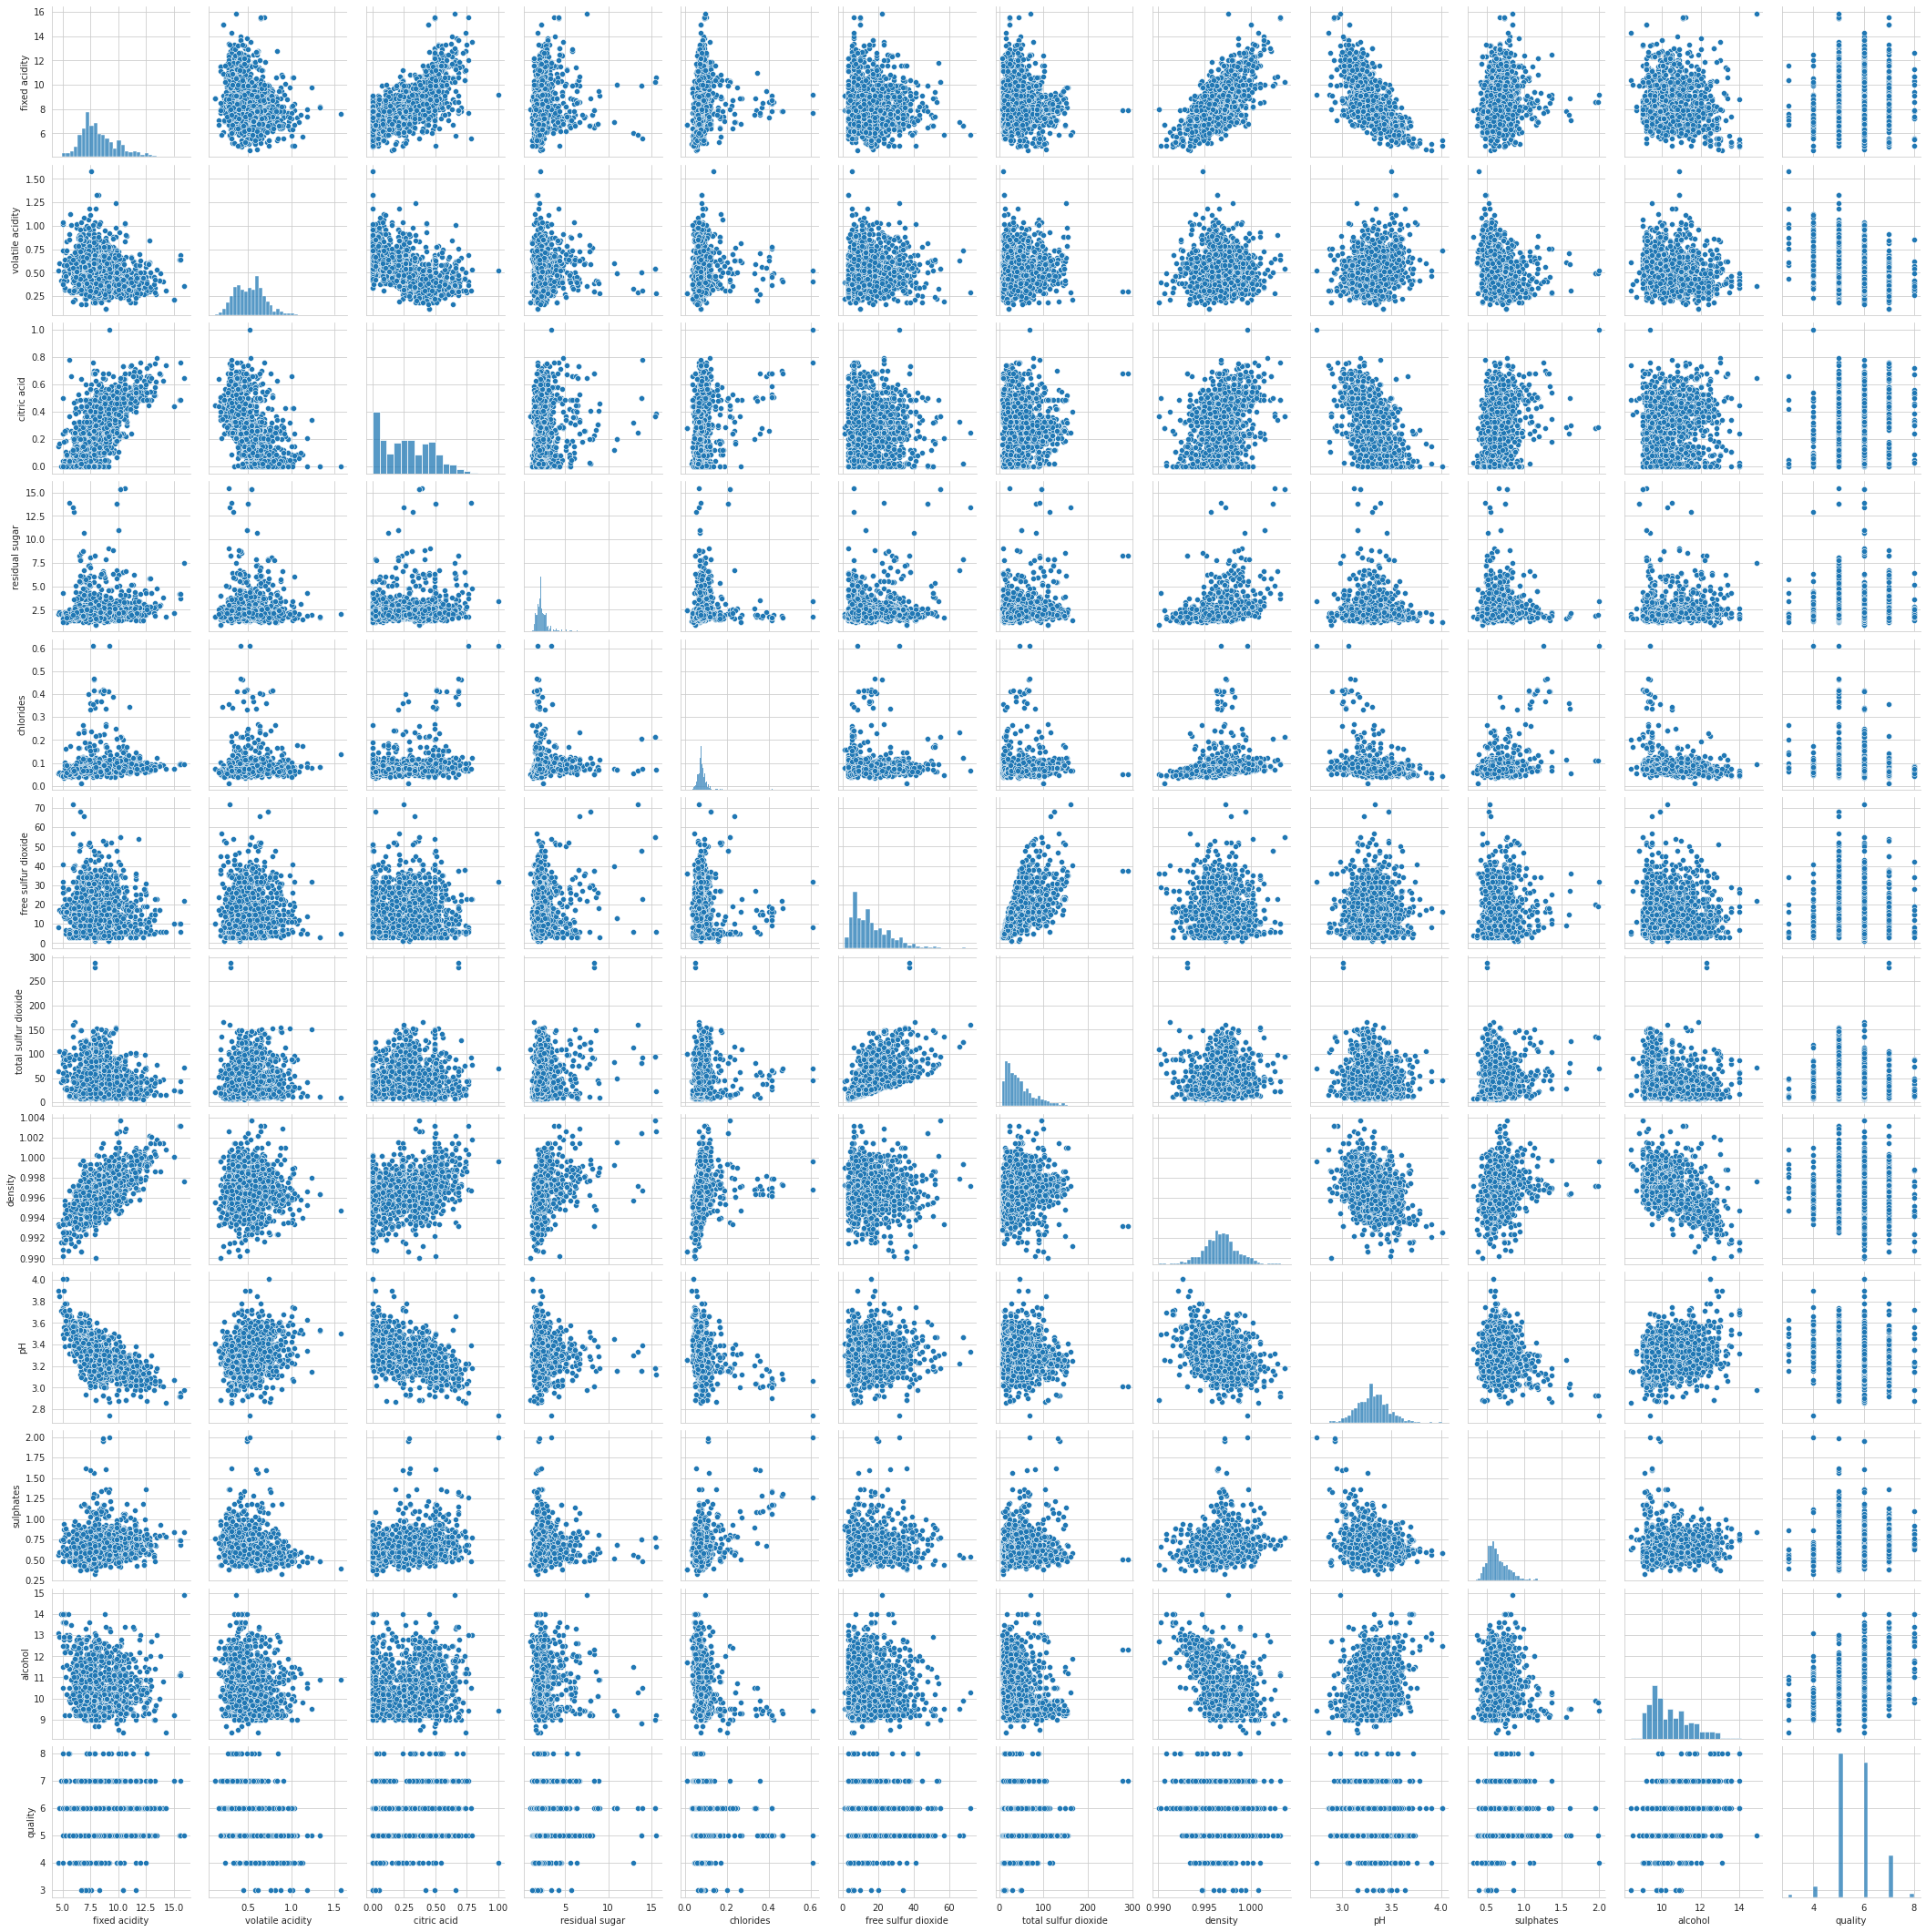

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(wine)

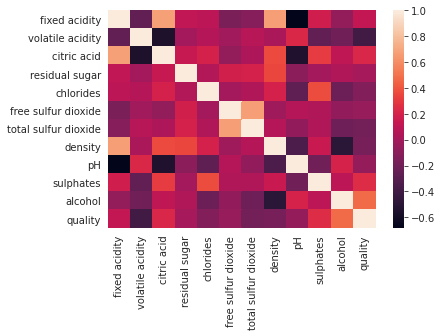

In [ ]:
sns.heatmap(wine.corr())

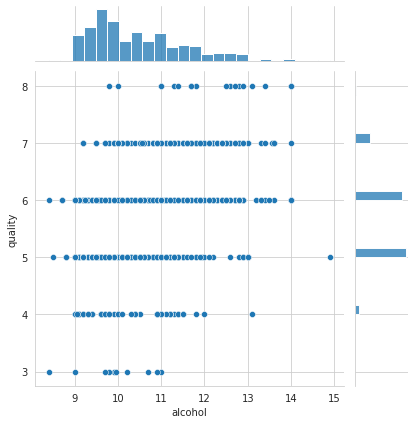

In [ ]:
sns.jointplot(x="alcohol",y="quality",data=wine)

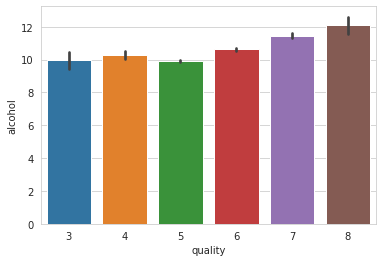

In [ ]:
sns.barplot(x="quality",y="alcohol",data=wine)

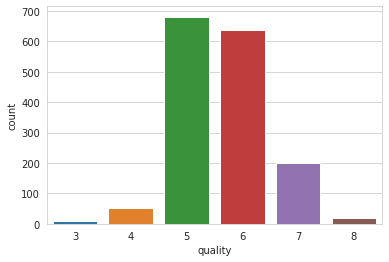

In [ ]:
sns.countplot(x="quality",data=wine)

In [ ]:
len(wine[wine["quality"]==3])

10

In [ ]:
len(wine[wine["quality"]==5])

681

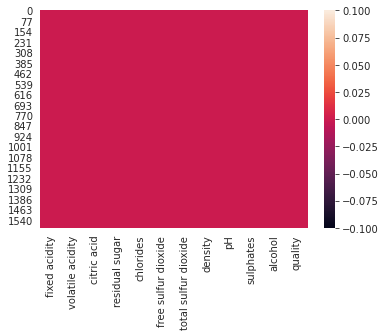

In [ ]:
sns.heatmap(wine.isnull())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=wine.drop("quality",axis=1)
y=wine["quality"]

In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
x["acidity"]=x["fixed acidity"]+x["volatile acidity"]


In [ ]:
x.drop(["fixed acidity","volatile acidity"],axis=1)

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,acidity
0,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,8.100
1,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,8.680
2,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,8.560
3,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,11.480
4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,8.100
...,...,...,...,...,...,...,...,...,...,...
1594,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,6.800
1595,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.450
1596,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.810
1597,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,6.545


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()


In [ ]:
scaled_x=scale.fit_transform(x)
scaled_x[:10]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611, -0.43877408],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711, -0.09830139],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711, -0.16874401],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711,  1.5453599 ],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611, -0.43877408],
       [-0.52835961,  0.73841761, -1.39147228, -0.5241662 , -0.26496041,
        -0.27493098, -

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.3)

In [ ]:
len(x_train)

1119

In [ ]:
len(x_test)

480

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1=LogisticRegression()

In [ ]:
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=model1.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.33      0.50      0.40         2
           4       1.00      0.05      0.10        20
           5       0.63      0.75      0.69       196
           6       0.58      0.61      0.59       198
           7       0.58      0.32      0.41        59
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.52      0.37      0.36       480
weighted avg       0.61      0.60      0.58       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
model2=RandomForestClassifier()

In [ ]:
model2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred1=model2.predict(x_test)

In [ ]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.69      0.80      0.74       196
           6       0.65      0.68      0.66       198
           7       0.75      0.51      0.61        59
           8       0.00      0.00      0.00         5

    accuracy                           0.67       480
   macro avg       0.35      0.33      0.34       480
weighted avg       0.64      0.67      0.65       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid={
    "n_estimators":[200,500],
    "max_features":["auto","sqrt","log2"],
    "max_depth":[4,5,6,7,8],
    "criterion":["gini","entropy"]
}

In [ ]:
CV_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)

In [ ]:
CV_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
model3=RandomForestClassifier(criterion="entropy",max_depth=7,max_features="auto",n_estimators=200)

In [ ]:
model3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred2=model3.predict(x_test)

In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.64      0.84      0.73       196
           6       0.59      0.58      0.58       198
           7       0.67      0.34      0.45        59
           8       0.00      0.00      0.00         5

    accuracy                           0.62       480
   macro avg       0.32      0.29      0.29       480
weighted avg       0.59      0.62      0.59       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10


In [ ]:
scaled_x[:10]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611, -0.43877408],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711, -0.09830139],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711, -0.16874401],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711,  1.5453599 ],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611, -0.43877408],
       [-0.52835961,  0.73841761, -1.39147228, -0.5241662 , -0.26496041,
        -0.27493098, -

In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='all')
x_sm, y_sm = smote.fit_sample(x, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
from collections import Counter
print('Resampled dataset shape: ',Counter(y_sm))

Resampled dataset shape:  Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [ ]:
len(x_sm)

2270

In [ ]:
x_sm[:3]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00, 8.100e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00, 8.680e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00, 8.560e+00]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3)

In [ ]:
type(y_sm)

numpy.ndarray

In [ ]:
model5=RandomForestClassifier()

In [ ]:
model5.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred4=model5.predict(x_test)

In [ ]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       220
           4       0.90      0.97      0.93       217
           5       0.78      0.76      0.77       200
           6       0.72      0.59      0.65       195
           7       0.83      0.88      0.86       200
           8       0.93      0.97      0.95       194

    accuracy                           0.87      1226
   macro avg       0.86      0.86      0.86      1226
weighted avg       0.86      0.87      0.86      1226



In [ ]:
model4=RandomForestClassifier(criterion="entropy",max_depth=7,max_features="auto",n_estimators=200)

In [ ]:
model4.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred3=model4.predict(x_test)

In [ ]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           3       0.95      0.99      0.97       220
           4       0.83      0.89      0.86       217
           5       0.68      0.72      0.70       200
           6       0.62      0.39      0.48       195
           7       0.76      0.78      0.77       200
           8       0.85      0.97      0.91       194

    accuracy                           0.80      1226
   macro avg       0.78      0.79      0.78      1226
weighted avg       0.78      0.80      0.78      1226

